In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score,mean_squared_error
import tensorflow as tf
sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# from imblearn.over_sampling import RandomOverSampler
# run the below command if imbalanced-learn not installed

'''import sys  
!{sys.executable} -m pip install imbalanced-learn'''

'import sys  \n!{sys.executable} -m pip install imbalanced-learn'

In [94]:
tf.__version__

'2.3.0'

In [2]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [3]:
le = preprocessing.LabelEncoder()

In [4]:
df_Math=pd.read_csv("./Maths.csv")
df_Math.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


In [5]:
df_Math.shape

(395, 33)

In [6]:
df_Math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
df_Math.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
df_Math['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [9]:
#one hot encoding on gender
gender=pd.get_dummies(df_Math['sex'],drop_first=True)
df_Math['gender']=gender
df_Math['gender'].value_counts()

0    208
1    187
Name: gender, dtype: int64

In [10]:
df_Math.drop(['sex'],axis=1,inplace=True)

In [11]:
detect_outliers_iqr(df_Math['age'])

13.0 21.0


[22]

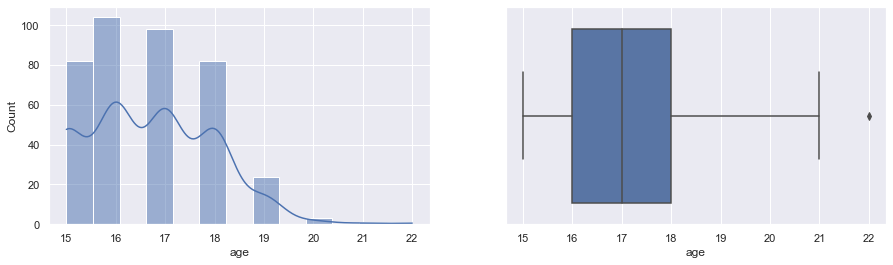

In [12]:
#outlier plot
fig = plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
sns.histplot(data=df_Math, x="age",kde=True)

plt.subplot(1,2,2)
sns.boxplot(x='age', data=df_Math)
plt.show()

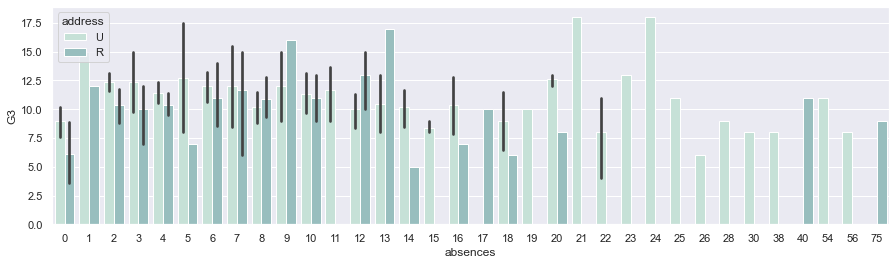

In [13]:
palette=sns.cubehelix_palette(start=.5, rot=-.5)
sns.set_palette(palette)
fig = plt.figure(figsize=[15,4])
sns.barplot(x='absences', y='G3', hue='address', data=df_Math)
plt.show()

-12.0 20.0


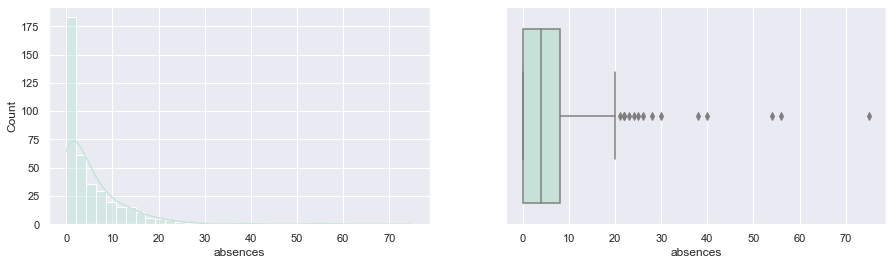

In [14]:
detect_outliers_iqr(df_Math['absences'])
fig = plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
sns.histplot(data=df_Math, x="absences",kde=True)

plt.subplot(1,2,2)
sns.boxplot(x='absences', data=df_Math)
plt.show()

In [15]:
df_Math['absences_skew_r']=np.where(df_Math['absences']>0, np.log(df_Math['absences']), 0)

C:\Users\Biswajit\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
df_Math.drop(['absences'],axis=1,inplace=True)
df_Math.head()

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,gender,absences_skew_r
0,GP,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,5,6,6,0,1.791759
1,GP,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,5,5,6,0,1.386294
2,GP,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,7,8,10,0,2.302585
3,GP,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,15,14,15,0,0.693147
4,GP,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,6,10,10,0,1.386294


-3.1191623125197534 5.19860385419959


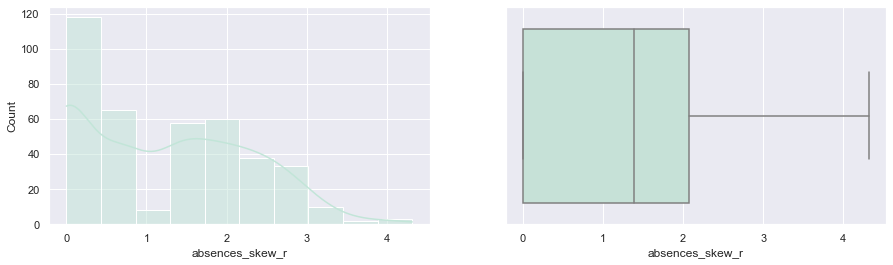

In [17]:
detect_outliers_iqr(df_Math['absences_skew_r'])
fig = plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
sns.histplot(data=df_Math, x="absences_skew_r",kde=True)

plt.subplot(1,2,2)
sns.boxplot(x='absences_skew_r', data=df_Math)
plt.show()

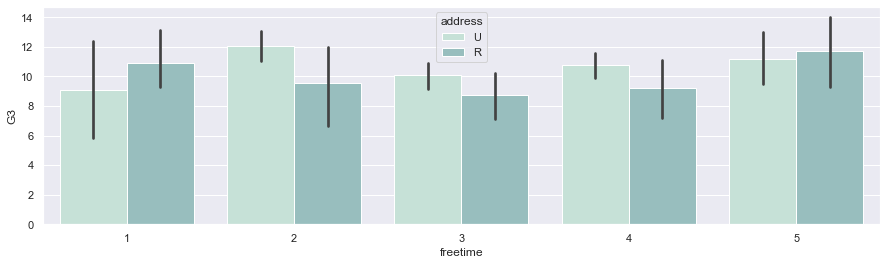

In [18]:
#freetime vs g3
palette=sns.cubehelix_palette(start=.5, rot=-.5)
sns.set_palette(palette)
fig = plt.figure(figsize=[15,4])
sns.barplot(x='freetime', y='G3', hue='address', data=df_Math)
plt.show()

1.5 5.5


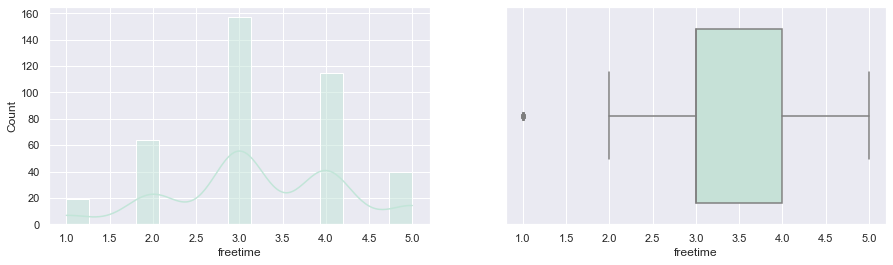

In [19]:
detect_outliers_iqr(df_Math['freetime'])
fig = plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
sns.histplot(data=df_Math, x="freetime",kde=True)

plt.subplot(1,2,2)
sns.boxplot(x='freetime', data=df_Math)
plt.show()

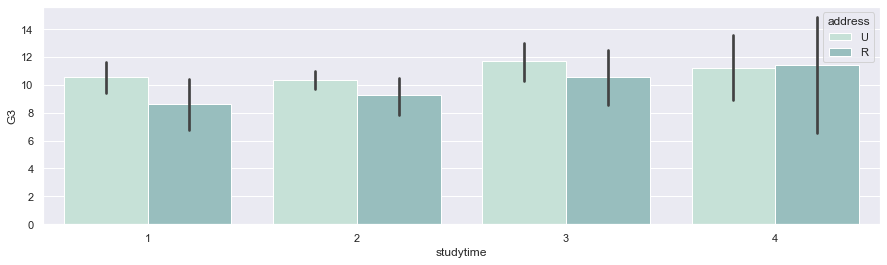

-0.5 3.5


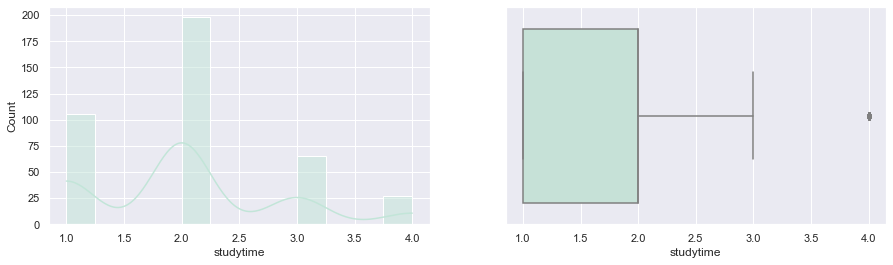

In [20]:
#studytime vs g3
palette=sns.cubehelix_palette(start=.5, rot=-.5)
sns.set_palette(palette)
fig = plt.figure(figsize=[15,4])
sns.barplot(x='studytime', y='G3', hue='address', data=df_Math)
plt.show()

detect_outliers_iqr(df_Math['studytime'])
fig = plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
sns.histplot(data=df_Math, x="studytime",kde=True)

plt.subplot(1,2,2)
sns.boxplot(x='studytime', data=df_Math)
plt.show()

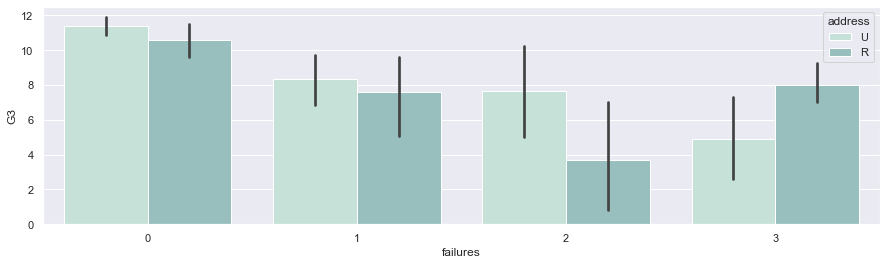

0.0 0.0


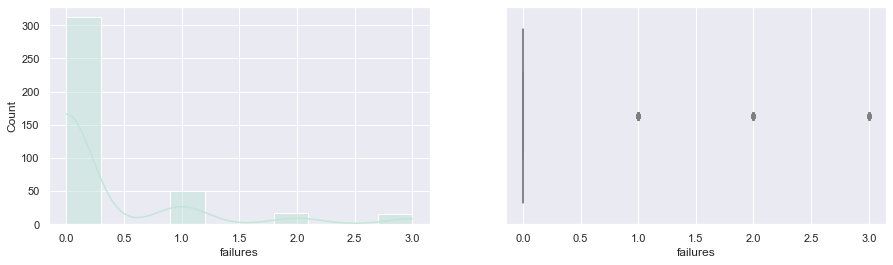

In [21]:
#failures vs g3
palette=sns.cubehelix_palette(start=.5, rot=-.5)
sns.set_palette(palette)
fig = plt.figure(figsize=[15,4])
sns.barplot(x='failures', y='G3', hue='address', data=df_Math)
plt.show()

detect_outliers_iqr(df_Math['failures'])
fig = plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
sns.histplot(data=df_Math, x="failures",kde=True)

plt.subplot(1,2,2)
sns.boxplot(x='failures', data=df_Math)
plt.show()

In [22]:
df_Math['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

In [23]:
#one hot encoding on address
address_encoded=pd.get_dummies(df_Math['address'],drop_first=True)
df_Math['address_encoded']=address_encoded
df_Math['address_encoded'].value_counts()

1    307
0     88
Name: address_encoded, dtype: int64

In [24]:
df_Math.drop(['address'],axis=1,inplace=True)

In [25]:
df_Math['address_encoded'].value_counts()

1    307
0     88
Name: address_encoded, dtype: int64

In [26]:
df_Math['famsize'].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

In [27]:
#label encoding on famsize
le.fit(df_Math['famsize']);
transform_encode=le.transform(df_Math['famsize'])
df_Math['famsize']=transform_encode

In [28]:
df_Math['famsize'].value_counts()

0    281
1    114
Name: famsize, dtype: int64

In [29]:
df_Math['Pstatus'].value_counts()

T    354
A     41
Name: Pstatus, dtype: int64

In [30]:
#one hot encoding on address
pstatus_encoded=pd.get_dummies(df_Math['Pstatus'],drop_first=True)
df_Math['pstatus_encoded']=pstatus_encoded
df_Math['pstatus_encoded'].value_counts()

1    354
0     41
Name: pstatus_encoded, dtype: int64

In [31]:
df_Math['Medu'].value_counts()

4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64

In [32]:
df_Math['Fedu'].value_counts()

2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64

In [33]:
df_Math['reason'].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

In [34]:
#label encoding on reason
le.fit(df_Math['reason']);
reason_encode=le.transform(df_Math['reason'])
df_Math['reason']=reason_encode

In [35]:
df_Math['reason'].value_counts()

0    145
1    109
3    105
2     36
Name: reason, dtype: int64

In [36]:
df_Math['guardian'].value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

In [37]:
#label encoding on guardian
le.fit(df_Math['guardian']);
guardian_encode=le.transform(df_Math['guardian'])
df_Math['guardian']=guardian_encode

In [38]:
df_Math['failures'].unique()

array([0, 3, 2, 1], dtype=int64)

In [39]:
df_Math['schoolsup'].value_counts()

no     344
yes     51
Name: schoolsup, dtype: int64

In [40]:
#one hot encoding on address
schoolsup_encoded=pd.get_dummies(df_Math['schoolsup'],drop_first=True)
df_Math['schoolsup_encoded']=schoolsup_encoded
df_Math['schoolsup_encoded'].value_counts()

0    344
1     51
Name: schoolsup_encoded, dtype: int64

In [41]:
df_Math['famsup'].value_counts()

yes    242
no     153
Name: famsup, dtype: int64

In [42]:
df_Math.drop(['schoolsup'],axis=1,inplace=True)

In [43]:
#one hot encoding on address
famsup_encoded=pd.get_dummies(df_Math['famsup'],drop_first=True)
df_Math['famsup_encoded']=famsup_encoded
df_Math['famsup_encoded'].value_counts()

1    242
0    153
Name: famsup_encoded, dtype: int64

In [44]:
df_Math['famsup_encoded'].value_counts()

1    242
0    153
Name: famsup_encoded, dtype: int64

In [45]:
df_Math.drop(['famsup'],axis=1,inplace=True)

In [46]:
df_Math['paid'].value_counts()

no     214
yes    181
Name: paid, dtype: int64

In [47]:
#one hot encoding on paid
paid_encoded=pd.get_dummies(df_Math['paid'],drop_first=True)
df_Math['paid_encoded']=paid_encoded
df_Math['paid_encoded'].value_counts()

0    214
1    181
Name: paid_encoded, dtype: int64

In [48]:
df_Math.drop(['paid'],axis=1,inplace=True)

In [49]:
df_Math['activities'].value_counts()

yes    201
no     194
Name: activities, dtype: int64

In [50]:
activities_encoded=pd.get_dummies(df_Math['activities'],drop_first=True)
df_Math['activities_encoded']=activities_encoded
df_Math['activities_encoded'].value_counts()

1    201
0    194
Name: activities_encoded, dtype: int64

In [51]:
df_Math.drop(['activities'],axis=1,inplace=True)

In [52]:
 df_Math['nursery'].value_counts()

yes    314
no      81
Name: nursery, dtype: int64

In [53]:
nursery_encoded=pd.get_dummies(df_Math['nursery'],drop_first=True)
df_Math['nursery_encoded']=nursery_encoded
df_Math['nursery_encoded'].value_counts()

1    314
0     81
Name: nursery_encoded, dtype: int64

In [54]:
df_Math.drop(['nursery'],axis=1,inplace=True)

In [55]:
 df_Math['higher'].value_counts()

yes    375
no      20
Name: higher, dtype: int64

In [56]:
higher_encoded=pd.get_dummies(df_Math['higher'],drop_first=True)
df_Math['higher_encoded']=higher_encoded
df_Math['higher_encoded'].value_counts()

1    375
0     20
Name: higher_encoded, dtype: int64

In [57]:
df_Math.drop(['higher'],axis=1,inplace=True)

In [58]:
df_Math['internet'].value_counts()

yes    329
no      66
Name: internet, dtype: int64

In [59]:
internet_encoded=pd.get_dummies(df_Math['internet'],drop_first=True)
df_Math['internet_encoded']=internet_encoded
df_Math['internet_encoded'].value_counts()

1    329
0     66
Name: internet_encoded, dtype: int64

In [60]:
df_Math.drop(['internet'],axis=1,inplace=True)

In [61]:
romantic_encoded=pd.get_dummies(df_Math['romantic'],drop_first=True)
df_Math['romantic_encoded']=romantic_encoded
df_Math['romantic_encoded'].value_counts()

0    263
1    132
Name: romantic_encoded, dtype: int64

In [62]:
df_Math.drop(['romantic'],axis=1,inplace=True)

In [63]:
df_Math.head()

,school,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,gender,absences_skew_r,address_encoded,pstatus_encoded,schoolsup_encoded,famsup_encoded,paid_encoded,activities_encoded,nursery_encoded,higher_encoded,internet_encoded,romantic_encoded
0,GP,18,0,A,4,4,at_home,teacher,0,1,2,2,0,4,3,4,1,1,3,5,6,6,0,1.791759,1,0,1,0,0,0,1,1,0,0
1,GP,17,0,T,1,1,at_home,other,0,0,1,2,0,5,3,3,1,1,3,5,5,6,0,1.386294,1,1,0,1,0,0,0,1,1,0
2,GP,15,1,T,1,1,at_home,other,2,1,1,2,3,4,3,2,2,3,3,7,8,10,0,2.302585,1,1,1,0,1,0,1,1,1,0
3,GP,15,0,T,4,2,health,services,1,1,1,3,0,3,2,2,1,1,5,15,14,15,0,0.693147,1,1,0,1,1,1,1,1,1,1
4,GP,16,0,T,3,3,other,other,1,0,1,2,0,4,3,2,1,2,5,6,10,10,0,1.386294,1,1,0,1,1,0,1,1,0,0


In [64]:
df_Math.drop(['Pstatus','Mjob','Fjob'],axis=1,inplace=True)

In [65]:
df_Math.drop(['school'],axis=1,inplace=True)

In [66]:
df_Math.head()

,age,famsize,Medu,Fedu,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,gender,absences_skew_r,address_encoded,pstatus_encoded,schoolsup_encoded,famsup_encoded,paid_encoded,activities_encoded,nursery_encoded,higher_encoded,internet_encoded,romantic_encoded
0,18,0,4,4,0,1,2,2,0,4,3,4,1,1,3,5,6,6,0,1.791759,1,0,1,0,0,0,1,1,0,0
1,17,0,1,1,0,0,1,2,0,5,3,3,1,1,3,5,5,6,0,1.386294,1,1,0,1,0,0,0,1,1,0
2,15,1,1,1,2,1,1,2,3,4,3,2,2,3,3,7,8,10,0,2.302585,1,1,1,0,1,0,1,1,1,0
3,15,0,4,2,1,1,1,3,0,3,2,2,1,1,5,15,14,15,0,0.693147,1,1,0,1,1,1,1,1,1,1
4,16,0,3,3,1,0,1,2,0,4,3,2,1,2,5,6,10,10,0,1.386294,1,1,0,1,1,0,1,1,0,0


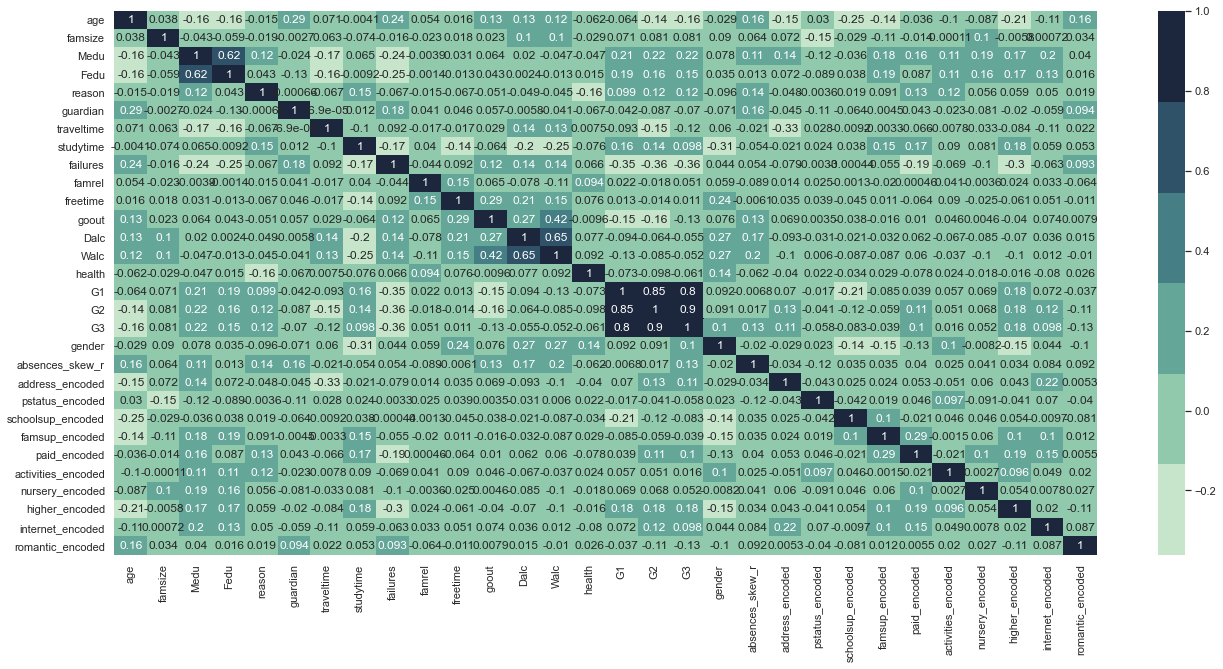

In [67]:
fig = plt.figure(figsize=[22,10])
    
sns.heatmap(df_Math.corr(), annot=True, cmap=sns.cubehelix_palette(rot=-.4))

plt.show()

In [68]:
df_Math.drop(['Dalc','goout','Medu','pstatus_encoded'],axis=1,inplace=True)

In [69]:
x=df_Math.drop(['G3'],axis=1)
y=df_Math['G3']

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [71]:
x_test.head()

,age,famsize,Fedu,reason,guardian,traveltime,studytime,failures,famrel,freetime,Walc,health,G1,G2,gender,absences_skew_r,address_encoded,schoolsup_encoded,famsup_encoded,paid_encoded,activities_encoded,nursery_encoded,higher_encoded,internet_encoded,romantic_encoded
329,17,0,4,0,1,2,3,0,4,3,2,4,14,14,0,1.386294,1,0,1,1,0,0,1,1,1
318,17,0,4,0,0,1,3,0,4,3,5,5,11,11,0,0.000000,0,0,1,1,1,0,1,1,0
317,18,0,3,0,1,1,3,0,4,3,1,5,9,10,0,2.197225,1,0,1,1,1,1,1,1,1
65,16,1,3,0,1,3,2,0,5,4,2,1,16,15,0,0.693147,1,0,1,0,1,1,1,1,0
59,16,0,2,0,1,1,2,0,4,2,1,5,15,16,0,0.693147,1,0,1,0,0,1,1,1,0


In [72]:
sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [73]:
x_train.shape

(316, 25)

In [74]:
ann = tf.keras.models.Sequential()

In [75]:
ann.add(tf.keras.layers.Dense(units=5, kernel_regularizer='l1', activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, kernel_regularizer='l1', activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, kernel_regularizer='l1', activation='relu'))
ann.add(tf.keras.layers.Dense(units=4, kernel_regularizer='l1', activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, kernel_regularizer='l1', activation='linear'))

In [76]:
ann.compile(optimizer = 'adam', loss=tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.losses.MeanSquaredError()])

In [77]:
ann.fit(x_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 134.8354 - mean_squared_error: 134.1270
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 131.2148 - mean_squared_error: 130.3030
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 129.0330 - mean_squared_error: 128.7004
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 127.5214 - mean_squared_error: 127.2245
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 126.1607 - mean_squared_error: 125.6005
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 124.8060 - mean_squared_error: 124.3166
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 123.2497 - mean_squared_error: 122.4960
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 121.3503 - mean_squared_error: 120.3359
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 118.9217 - mean_squared

32/32 [==============================] - 0s 2ms/step - loss: 3.2071 - mean_squared_error: 2.6608
Epoch 75/100
32/32 [==============================] - 0s 2ms/step - loss: 3.1330 - mean_squared_error: 2.6104
Epoch 76/100
32/32 [==============================] - 0s 1ms/step - loss: 3.0689 - mean_squared_error: 2.5386
Epoch 77/100
32/32 [==============================] - 0s 1ms/step - loss: 3.0000 - mean_squared_error: 2.4672
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 2.9611 - mean_squared_error: 2.4225
Epoch 79/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9194 - mean_squared_error: 2.4160
Epoch 80/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8685 - mean_squared_error: 2.3504
Epoch 81/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8276 - mean_squared_error: 2.3005
Epoch 82/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8210 - mean_squared_error: 2.3068
Epoch 83/100
32/32 [===

In [78]:
y_pred=ann.predict(x_test)

In [79]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred, squared=False))

0.7754762491134635
2.488845439628484


In [80]:
p=[x[0] for x in y_pred]

In [81]:
t=y_test

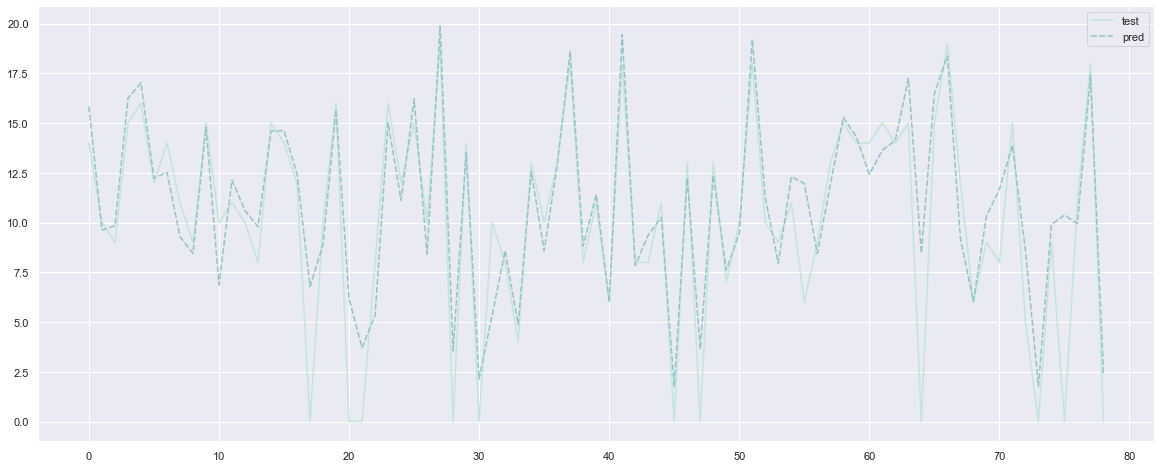

In [82]:
#Plot of prediction and real test data
dframe=pd.DataFrame({"test":y_test.values,"pred":p})
fig = plt.figure(figsize=[20,8])
sns.lineplot(data=dframe)

plt.show()

In [278]:
x.loc[317].values

array([18.        ,  0.        ,  3.        ,  0.        ,  1.        ,
        1.        ,  3.        ,  0.        ,  4.        ,  3.        ,
        1.        ,  5.        ,  9.        , 10.        ,  0.        ,
        2.19722458,  1.        ,  0.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ])

In [83]:
df_Math.loc[317]

age                   18.000000
famsize                0.000000
Fedu                   3.000000
reason                 0.000000
guardian               1.000000
traveltime             1.000000
studytime              3.000000
failures               0.000000
famrel                 4.000000
freetime               3.000000
Walc                   1.000000
health                 5.000000
G1                     9.000000
G2                    10.000000
G3                     9.000000
gender                 0.000000
absences_skew_r        2.197225
address_encoded        1.000000
schoolsup_encoded      0.000000
famsup_encoded         1.000000
paid_encoded           1.000000
activities_encoded     1.000000
nursery_encoded        1.000000
higher_encoded         1.000000
internet_encoded       1.000000
romantic_encoded       1.000000
Name: 317, dtype: float64

In [84]:
#t=x.iloc[317]
t=[18,0,3,0,1,1,3,0,4,3,1,5,9,10,0,2.197225,1,0,1,1,1,1,1,1,1]
len(t)
sc_t = preprocessing.StandardScaler()
ann.predict(sc.transform([t]))

array([[9.839693]], dtype=float32)

In [86]:
#pickling
import pickle

In [87]:
pickle.dump(sc, open('scTransformer.pkl','wb'))

In [90]:
pickle.dump(ann, open('spModel.pkl','wb'))

TypeError: cannot pickle '_thread.RLock' object

In [96]:
from tensorflow.keras.models import save_model
save_model(ann, "studentPerformanceModel.h5")

In [100]:
from tensorflow.keras.models import load_model
model = load_model('studentPerformanceModel.h5', compile=False)
pickled_sc=pickle.load(open('scTransformer.pkl','rb'))

In [102]:
model.predict(pickled_sc.transform([t]))

array([[9.839693]], dtype=float32)

In [91]:
# import joblib

In [95]:
# joblib.dump(ann, 'studentPerformanceModel.pkl')